In [1]:
# package load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from geopy.geocoders import Nominatim
from tqdm import tqdm

# for korean plotting
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# Pandas option
pd.set_option('display.max_columns', None)

In [2]:
result = pd.read_csv('data/stKDE_3000_24.csv')
grid = gpd.read_file('data/CENSUS/grid.gpkg')

In [3]:
result_grid = result.groupby(['X','Y'], as_index=False).sum()
result_grid = gpd.GeoDataFrame(result_grid['density'], geometry=gpd.points_from_xy(result_grid.X, result_grid.Y), crs='epsg:5181')

In [4]:
# 격자에 병합
grid['density'] = 0.0
for i in range(len(grid)):
    grid.iat[i, 2] = result_grid.iat[np.where(result_grid.geometry.intersects(grid.geometry[i]))[0][0],0]

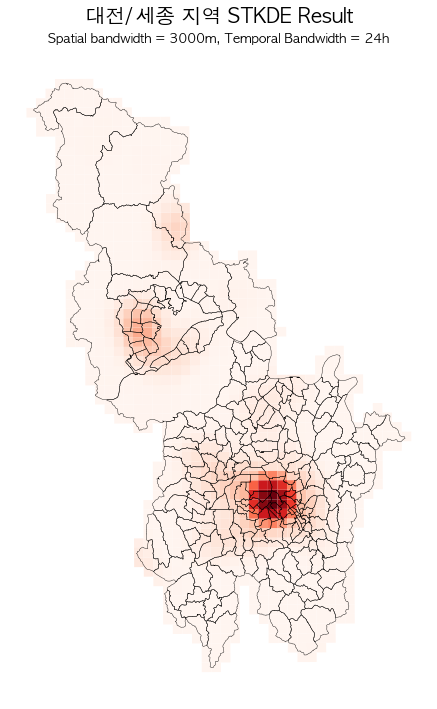

In [6]:
# Plot
from matplotlib.colors import ListedColormap

whole_area = gpd.read_file('data/whole_adm_대전세종.gpkg').to_crs(epsg=5181)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,10))
whole_area.boundary.plot(ax=ax, zorder=2, color='black', linewidth = 0.4)
grid.plot(column = 'density',ax=ax, zorder=1, cmap='Reds')
# gdf_crime.geometry.plot(ax=ax, zorder=2, color='red', alpha=0.1, markersize=2)

ax.set_axis_off()

plt.suptitle('대전/세종 지역 STKDE Result', fontsize=20)
plt.title('Spatial bandwidth = 3000m, Temporal Bandwidth = 24h', fontsize=13)
plt.tight_layout()
plt.savefig('plot/대전세종 지역 내 보이스피싱 핫스팟_3000*24.png', facecolor='white')
plt.show()

## Merge with other data

In [15]:
df_full = gpd.read_file('df_full.gpkg').set_index('GRID_1K_CD')

In [16]:
df_full = grid.set_index('GRID_1K_CD').join(df_full[df_full.columns.drop('geometry')])

,geometry,density,ATM,Busstop,Convenience,생활서비스,소매,학문/교육,음식,관광/여가/오락,부동산,스포츠,숙박,in_age_001,in_age_002,in_age_003,in_age_004,in_age_005,in_age_006,in_age_007,in_age_008,in_age_009,in_age_010,in_age_011,in_age_012,in_age_013,in_age_014,in_age_015,in_age_016,in_age_017,in_age_018,in_age_019,in_age_020,in_age_021,in_age_031,in_age_032,in_age_033,in_age_034,in_age_035,in_age_036,in_age_037,in_age_038,in_age_039,in_age_040,in_age_041,in_age_042,in_age_043,in_age_044,in_age_045,in_age_046,in_age_047,in_age_048,in_age_049,in_age_050,in_age_051,in_age_061,in_age_062,in_age_063,in_age_064,in_age_065,in_age_066,in_age_067,in_age_068,in_age_069,in_age_070,in_age_071,in_age_072,in_age_073,in_age_074,in_age_075,in_age_076,in_age_077,in_age_078,in_age_079,in_age_080,in_age_081,to_in_001,to_in_007,to_in_008
GRID_1K_CD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
다바8400,"POLYGON ((228963.099 299953.355, 228957.943 30...",0.000001,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
다바8500,"POLYGON ((229963.493 299958.511, 229958.337 30...",0.000001,0,5,0,0,0,0,2,0,0,0,3,NaN,NaN,0.0,5.0,5.0,0.0,5.0,NaN,0.0,5.0,8.0,5.0,8.0,0.0,5.0,5.0,8.0,NaN,5.0,0.0,NaN,NaN,NaN,0.0,5.0,5.0,0.0,5.0,NaN,0.0,0.0,5.0,5.0,8.0,NaN,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,5.0,5.0,0.0,5.0,0.0,0.0,5.0,8.0,NaN,5.0,0.0,NaN,48.0,23.0,23.0
다바8600,"POLYGON ((230963.889 299963.667, 230958.733 30...",0.000002,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
다바9300,"POLYGON ((237966.690 299999.757, 237961.534 30...",0.000001,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,5.0,5.0,0.0,NaN,NaN,NaN,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,5.0,5.0,0.0,NaN,NaN,NaN,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,8.0,5.0
다바9400,"POLYGON ((238967.095 300004.913, 238961.938 30...",0.000003,0,2,0,0,0,0,4,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
라바0224,"POLYGON ((246846.310 324056.093, 246841.127 32...",0.000000,0,3,0,0,0,0,4,0,0,0,0,NaN,NaN,0.0,0.0,5.0,5.0,NaN,0.0,0.0,5.0,8.0,8.0,13.0,8.0,5.0,0.0,5.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,5.0,0.0,NaN,0.0,0.0,5.0,8.0,5.0,8.0,5.0,5.0,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,5.0,5.0,5.0,8.0,5.0,0.0,NaN,0.0,5.0,0.0,NaN,NaN,58.0,38.0,23.0
라바0324,"POLYGON ((247846.724 324061.276, 247841.541 32...",0.000000,0,3,0,0,0,0,1,0,0,0,0,NaN,NaN,NaN,5.0,5.0,5.0,0.0,0.0,5.0,5.0,0.0,5.0,5.0,8.0,8.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,NaN,NaN,0.0,5.0,NaN,5.0,0.0,5.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,38.0,18.0,18.0
라바0225,"POLYGON ((246841.127 325056.507, 246835.943 32...",0.000000,0,2,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,